epoch: 0, loss: 0.25550160163820484, accuracy: 0.55
epoch: 1000, loss: 0.01470348415634327, accuracy: 1.0
epoch: 2000, loss: 0.007739255502554464, accuracy: 1.0
epoch: 3000, loss: 0.005247297474932305, accuracy: 1.0
epoch: 4000, loss: 0.003962679559763278, accuracy: 1.0
epoch: 5000, loss: 0.0031790441330778723, accuracy: 1.0
epoch: 6000, loss: 0.0026469361860291325, accuracy: 1.0
epoch: 7000, loss: 0.0022581562656887166, accuracy: 1.0
epoch: 8000, loss: 0.0019592046313445855, accuracy: 1.0
epoch: 9000, loss: 0.0017208519286392642, accuracy: 1.0
[[5.63065938e-06]
 [9.99824210e-01]
 [1.26418293e-05]
 [9.99990153e-01]
 [4.30840136e-04]
 [9.99981574e-01]
 [9.99989705e-01]
 [3.37829506e-05]
 [7.29683097e-06]
 [3.58126511e-05]
 [7.70946899e-06]
 [9.99983813e-01]
 [2.73424027e-01]
 [4.52418694e-04]
 [2.26573999e-02]
 [1.28905791e-05]
 [6.06169999e-06]
 [9.99960901e-01]
 [9.99990815e-01]
 [9.99990267e-01]
 [9.99981646e-01]
 [9.99990628e-01]
 [9.99988127e-01]
 [9.99990298e-01]
 [4.43241976e-05]

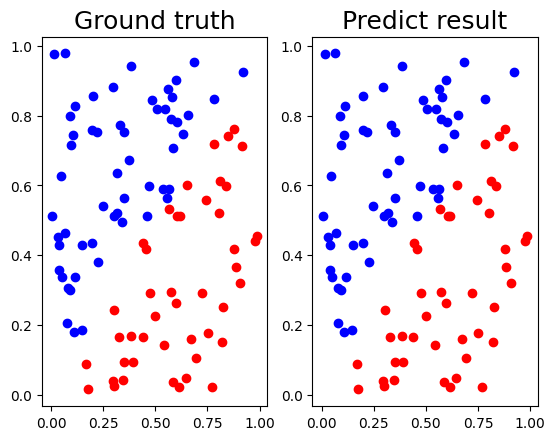

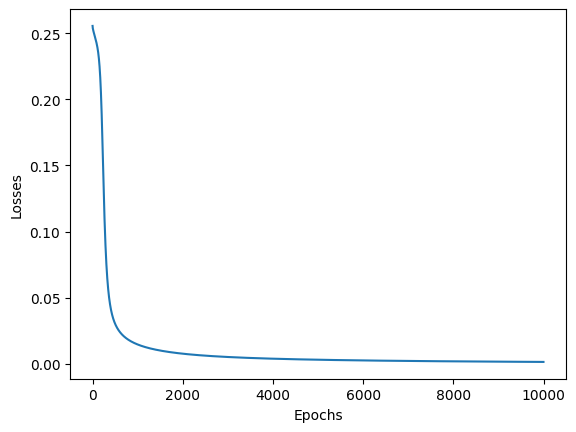

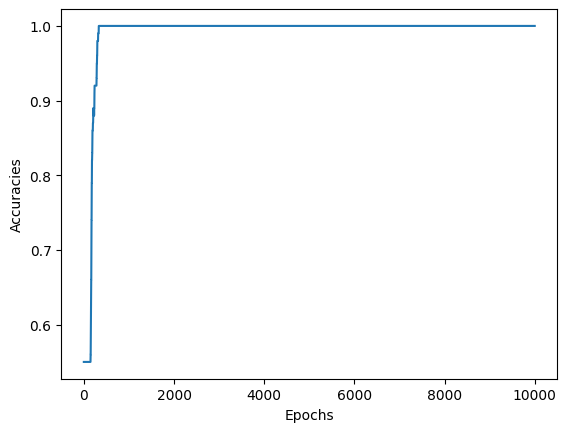

In [1]:
import actfcn
import optimizer
import nn
import utils
import numpy as np
import matplotlib.pyplot as plt

if __name__ == "__main__":
    np.random.seed(10)
    x, y = utils.generate_linear(100)
    
    dims = (4, 4)
    bias = True
    act = actfcn.Sigmoid
    opt = optimizer.SGD
    opt_param = opt.param(0.01)
    
    nn = nn.NN(dims, bias, act, opt, opt_param)
    loss = utils.MSE()
    losses = []
    accuracies = []
    y_pred = []
    
    epochs = int(10000)
    for epoch in range(epochs):
        y_pred = nn.forward(x)
        loss_value = loss.forward(y, y_pred)
        losses.append(loss_value)
        accuracy_value = utils.accuracy(y, y_pred)
        accuracies.append(accuracy_value)

        dy = loss.backward(y, y_pred)
        nn.backward(dy)

        if epoch % (epochs / 10) == 0:
            print(f"epoch: {epoch}, loss: {loss_value}, accuracy: {accuracy_value}")

    print(y_pred)
    y_pred = np.around(y_pred)
    utils.show_result(x, y, y_pred)
    plt.xlabel('Epochs')
    plt.ylabel('Losses')
    plt.plot(losses)
    plt.show()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracies')
    plt.plot(accuracies)
    plt.plot()